# Logistic Regression

#### Introduction
Logistic Regression is a **supervised learning algorithm** used for **classification tasks**. It predicts **probabilities** and is commonly used in **binary classification problems** (e.g., spam detection, disease prediction).

#### How It Works
Instead of predicting a continuous value (like Linear Regression), Logistic Regression predicts the **probability (p) that an instance belongs to a certain class** using the **sigmoid function**:

\[
p = \frac{1}{1 + e^{-(wX + b)}}
\]

Where:
- \( wX + b \) is the **linear equation** (weights and bias),
- \( e \) is Euler’s number (~2.718),
- The result is between **0 and 1**, interpreted as a probability.

#### Decision Boundary
- If \( p \geq 0.5 \), classify as **1** (positive class).
- If \( p < 0.5 \), classify as **0** (negative class).

This forms a **decision boundary** that separates different classes.

#### Cost Function (Log Loss)
Logistic Regression uses **Log Loss (Binary Cross-Entropy)** to measure how well the model predicts:

\[
J(w, b) = -\frac{1}{m} \sum \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
\]

Where:
- \( y \) is the actual class (0 or 1),
- \( \hat{y} \) is the predicted probability,
- \( m \) is the number of samples.

#### Types of Logistic Regression
- **Binary Logistic Regression** → Two classes (e.g., spam or not spam).
- **Multiclass Logistic Regression** → Multiple classes using **One-vs-Rest (OvR)** or **Softmax Regression**.

#### Advantages
- Simple and efficient for classification  
- Interpretable and easy to implement  
- Works well with **linearly separable** data  

#### Limitations
- Struggles with **non-linear** relationships (requires feature engineering or a more complex model).  
- Sensitive to **outliers**.  
- Assumes **independent features** (may require preprocessing).  



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('Data/heartdiseases.csv')
data.head()

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No


In [3]:
data.shape

(50, 7)

In [4]:
# Encoding categorical features into numerical values
# Binary encoding for Gender, smoker, Heart_disease
# Ordinal encoding for Education
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding Binary features
binary_encoder = LabelEncoder()
data["Gender"] = binary_encoder.fit_transform(data["Gender"])
data["Smoker"] = binary_encoder.fit_transform(data["Smoker"])
data["Heart_Disease"] = binary_encoder.fit_transform(data["Heart_Disease"])
data.head(10)


,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,0,Bachelor's Degree,65000,0,180,0
1,55,1,High School Diploma,40000,1,245,1
2,30,0,Master's Degree,80000,1,210,0
3,39,1,Some College,50000,1,195,0
4,27,1,Some College,30000,0,170,0
5,46,0,Doctorate Degree,90000,0,200,1
6,35,1,Some College,55000,0,190,0
7,48,0,High School Diploma,42000,1,225,1
8,29,1,Bachelor's Degree,70000,1,185,0
9,54,0,Some College,48000,0,235,1


In [5]:
data.head(10)

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,0,Bachelor's Degree,65000,0,180,0
1,55,1,High School Diploma,40000,1,245,1
2,30,0,Master's Degree,80000,1,210,0
3,39,1,Some College,50000,1,195,0
4,27,1,Some College,30000,0,170,0
5,46,0,Doctorate Degree,90000,0,200,1
6,35,1,Some College,55000,0,190,0
7,48,0,High School Diploma,42000,1,225,1
8,29,1,Bachelor's Degree,70000,1,185,0
9,54,0,Some College,48000,0,235,1


In [9]:
print(data["Education"].unique())  # Show unique values


["Bachelor's Degree" 'High School Diploma' "Master's Degree"
 'Some College' 'Doctorate Degree']


In [7]:
# One-hot encoding for education column
encoder = OneHotEncoder(drop="first", sparse_output=False) # Avoid dummy variable trap

# reshape education column for encoding
education_encoded = encoder.fit_transform(data[["Education"]])

# Convert to dataframe with column names
education_encoded_df = pd.DataFrame(
    education_encoded,
    columns=encoder.get_feature_names_out(["Education"])
)

# Merge with original dataset (drop original Education column)
data_final = data.drop(columns=["Education"]).join(education_encoded_df)
data_final.head(10)

,Age,Gender,Income,Smoker,Cholesterol,Heart_Disease,Education_Doctorate Degree,Education_High School Diploma,Education_Master's Degree,Education_Some College
0,42,0,65000,0,180,0,0.0,0.0,0.0,0.0
1,55,1,40000,1,245,1,0.0,1.0,0.0,0.0
2,30,0,80000,1,210,0,0.0,0.0,1.0,0.0
3,39,1,50000,1,195,0,0.0,0.0,0.0,1.0
4,27,1,30000,0,170,0,0.0,0.0,0.0,1.0
5,46,0,90000,0,200,1,1.0,0.0,0.0,0.0
6,35,1,55000,0,190,0,0.0,0.0,0.0,1.0
7,48,0,42000,1,225,1,0.0,1.0,0.0,0.0
8,29,1,70000,1,185,0,0.0,0.0,0.0,0.0
9,54,0,48000,0,235,1,0.0,0.0,0.0,1.0


In [10]:
data_final.shape

(50, 10)

In [ ]:
# Split data into features and label
X = data_final.drop('Heart_Disease', axis=1) # axis = 1, removes the column not rows
y = data_final['Heart_Disease']

# Split data into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
# make predictions
y_pred = log_reg.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [18]:
# testing the accuracy
accuracy_score(y_test, y_pred)

0.9

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[:,1] 
y_pred_proba
# log_reg.predict_proba(X_test) returns the predicted probabilities for both classes (0 and 1).
# [:, 1] extracts the probabilities of class 1 (Heart Disease = Yes).

array([0.38567143, 0.06694144, 0.92410432, 0.6523888 , 0.47719144,
       0.16399602, 0.16399602, 0.87668172, 0.29051596, 0.34076207])

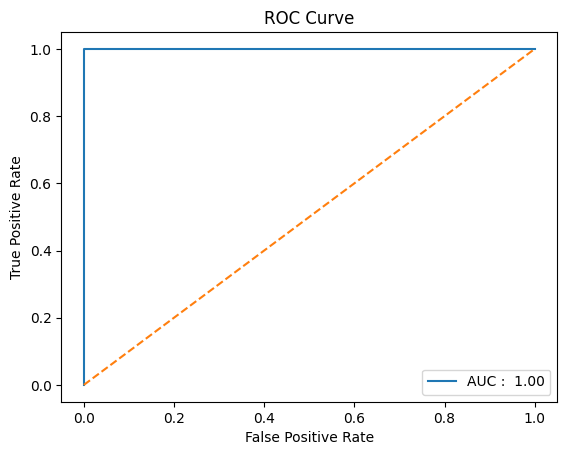

In [21]:
# Evaluate the perfomance of Logistic Regression model
y_test = np.ravel(y_test)  # Ensure it's a 1D array
y_pred_proba = np.ravel(y_pred_proba)  # Ensure it's a 1D array

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'AUC : {auc: .2f}')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc= 'lower right')
plt.show()

In [22]:
odds_ratios = np.exp(log_reg.coef_)
odds_ratios

array([[1.30141012, 0.9959927 , 0.99996521, 1.00176759, 0.95946595,
        1.00785581, 1.00966092, 0.9980457 , 0.9883148 ]])

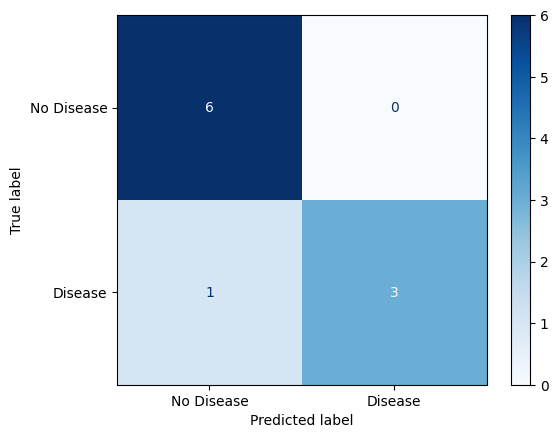

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues")
plt.show()
